<a href="https://colab.research.google.com/github/Anusha-T8/ProgrammingAssignment2/blob/master/reopeningcinemas_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from scipy import stats

In [ ]:
path="/content/audience_cinema_cleaned_dataset"
df=pd.read_csv(path, index_col=0)

In [ ]:
df.head()

,Name,Age,Sex,Occupation,Eager,Location,Implement_safety,alternate_seating,Price_hike,Visit_time,Food_option,Risk_factor,Factors_impacting,Trustworthy,Risk_factor-binned,Cinemas,OTT
0,Karthik R,18-28,Male,Student,No,Urban,Strongly agree,Agree,No,Night time (the last two shows when there is l...,Highly prefer carrying own food,4,To hang out with friends/families,Theatre,High,1,0
1,Aishwarya E D'Souza,18-28,Female,Student,No,Urban,Disagree,Disagree,No,Not visiting cinemas,Not visiting Cinemas,4,"Precautions taken by cinemas, Cinemas in conta...",PVR,High,0,1
2,Chandan,18-28,Male,Student,No,Urban,"Neutral, depends on the number of people visit...",Disagree,No,Night time (the last two shows when there is l...,Not visiting Cinemas,4,Not interested in visiting cinemas,None,High,0,1
3,Sunaina,18-28,Female,Professionals/Government/Private employees,No,Urban,Strongly agree,Agree,No,Not visiting cinemas,Not visiting Cinemas,4,Not interested in visiting cinemas,PVR,High,0,1
4,Sunaina,18-28,Female,Professionals/Government/Private employees,No,Urban,Strongly agree,Agree,No,Not visiting cinemas,Not visiting Cinemas,4,Not interested in visiting cinemas,PVR,High,0,1


In [ ]:
df.dtypes

Name                  object
Age                   object
Sex                   object
Occupation            object
Eager                 object
Location              object
Implement_safety      object
alternate_seating     object
Price_hike            object
Visit_time            object
Food_option           object
Risk_factor            int64
Factors_impacting     object
Trustworthy           object
Risk_factor-binned    object
Cinemas                int64
OTT                    int64
dtype: object

In [ ]:
df.describe()

,Risk_factor,Cinemas,OTT
count,140.000000,140.000000,140.000000
mean,3.678571,0.514286,0.485714
std,1.282241,0.501590,0.501590
min,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000
50%,4.000000,1.000000,0.000000
75%,5.000000,1.000000,1.000000
max,5.000000,1.000000,1.000000


In [ ]:
df.describe(include=object)

,Name,Age,Sex,Occupation,Eager,Location,Implement_safety,alternate_seating,Price_hike,Visit_time,Food_option,Factors_impacting,Trustworthy,Risk_factor-binned
count,140,140,140,140,140,140,140,140,140,140,140,140,140,140
unique,132,4,2,6,2,2,3,2,2,4,5,40,8,3
top,Deepthi D H,18-28,Male,Professionals/Government/Private employees,No,Urban,Strongly agree,Agree,No,Anytime as per your conveience,Highly prefer carrying own food,Coronavirus cases in the city,PVR,High
freq,2,87,76,57,94,128,108,87,105,62,61,24,71,87


In [ ]:
categorical_data=df.select_dtypes(include=['object'])
categorical_data


,Name,Age,Sex,Occupation,Eager,Location,Implement_safety,alternate_seating,Price_hike,Visit_time,Food_option,Factors_impacting,Trustworthy,Risk_factor-binned
0,Karthik R,18-28,Male,Student,No,Urban,Strongly agree,Agree,No,Night time (the last two shows when there is l...,Highly prefer carrying own food,To hang out with friends/families,Theatre,High
1,Aishwarya E D'Souza,18-28,Female,Student,No,Urban,Disagree,Disagree,No,Not visiting cinemas,Not visiting Cinemas,"Precautions taken by cinemas, Cinemas in conta...",PVR,High
2,Chandan,18-28,Male,Student,No,Urban,"Neutral, depends on the number of people visit...",Disagree,No,Night time (the last two shows when there is l...,Not visiting Cinemas,Not interested in visiting cinemas,None,High
3,Sunaina,18-28,Female,Professionals/Government/Private employees,No,Urban,Strongly agree,Agree,No,Not visiting cinemas,Not visiting Cinemas,Not interested in visiting cinemas,PVR,High
4,Sunaina,18-28,Female,Professionals/Government/Private employees,No,Urban,Strongly agree,Agree,No,Not visiting cinemas,Not visiting Cinemas,Not interested in visiting cinemas,PVR,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Sagar,38-48,Male,Professionals/Government/Private employees,No,Urban,Strongly agree,Agree,Yes,Anytime as per your conveience,Highly prefer carrying own food,"Precautions taken by cinemas, Not interested i...",None,High
136,Aishwarya,28-38,Female,Professionals/Government/Private employees,No,Urban,Strongly agree,Agree,No,Anytime as per your conveience,Highly prefer carrying own food,"Precautions taken by cinemas, Coronavirus case...",None,High
137,Shashi,38-48,Male,Professionals/Government/Private employees,No,Urban,Strongly agree,Agree,No,Anytime as per your conveience,No food should be entertained at cinemas,Coronavirus cases in the city,None,High
138,Kishan,28-38,Male,Business,No,Urban,"Neutral, depends on the number of people visit...",Disagree,No,Anytime as per your conveience,Highly prefer carrying own food,Precautions taken by cinemas,PVR,High


In [ ]:
for columns in categorical_data.columns.values.tolist():
    print(columns)
    print(categorical_data[columns].value_counts())
    print('')

Name
Deepthi D H                 2
Akshata S Mantorshettar     2
Sunaina                     2
Lakshmi                     2
Paramesh                    2
                           ..
Roopa J                     1
Shashi                      1
Jayashree                   1
Kavana                      1
Sharanya                    1
Name: Name, Length: 132, dtype: int64

Age
18-28       87
38-48       24
28-38       22
Above 48     7
Name: Age, dtype: int64

Sex
Male      76
Female    64
Name: Sex, dtype: int64

Occupation
Professionals/Government/Private employees    57
Student                                       46
Business                                      22
Home maker                                     7
Unemployed                                     5
Retired                                        3
Name: Occupation, dtype: int64

Eager
No     94
Yes    46
Name: Eager, dtype: int64

Location
Urban    128
Rural     12
Name: Location, dtype: int64

Implement_safety
Strongly a

In [ ]:
pd.crosstab(index=df['Eager'],columns='count',dropna=True)

col_0,count
Eager,
No,94
Yes,46


from the table above we can observe that most of the people are not eager to rush into cinemas

In [ ]:
pd.crosstab(index=df['OTT'],columns=df['Eager'],dropna=True)

Eager,No,Yes
OTT,,
0,32,40
1,62,6


people who are not eager to visit cinemas have opted more of OTT option to watch new movies.
Therefore the people count who are not eager to visit cinemas and prefer OTT platforms is of 62.

In [ ]:
pd.crosstab(index=df['Cinemas'],columns=df['Eager'],dropna=True)

Eager,No,Yes
Cinemas,,
0,62,6
1,32,40


Similarly, people who are eager to visit cinemas prefer to watch new movies in cinema but not OTT are in 40 numbers.

In [ ]:
pd.crosstab(index=df['Risk_factor-binned'],columns=df['Eager'],dropna=True)

Eager,No,Yes
Risk_factor-binned,,
High,73,14
Low,5,6
Medium,16,26


In [ ]:
pd.crosstab(index=df['Risk_factor-binned'],columns=df['Eager'],normalize=True, dropna=True)

Eager,No,Yes
Risk_factor-binned,,
High,0.521429,0.100000
Low,0.035714,0.042857
Medium,0.114286,0.185714


from joint probability we can observe that people who are not eager to rush into cinemas with high risk rate is 0.521429 i.e. 52.14%

And also people who are eager to rush into cinemas with high risk rate is about 10%.

In [ ]:
pd.crosstab(index=df['Cinemas'],columns=df['Eager'],normalize=True, dropna=True)

Eager,No,Yes
Cinemas,,
0,0.442857,0.042857
1,0.228571,0.285714


From joint probability, people who are willing to visit cinemas and watch new movies in cinemas itself is of 28.5% 
And people who want it in OTT platform and not eager to visit cinema is of 44.28%.

**CONDITIONAL PROBABILITY**

Scenario: Given, people are not willing to visit cinemas. What will be the probability of them watching movies on OTT platform.

In [ ]:
 pd.crosstab(index=df['OTT'],columns=df['Eager'],normalize='columns',
              margins=True,dropna=True)

Eager,No,Yes,All
OTT,,,
0,0.340426,0.869565,0.514286
1,0.659574,0.130435,0.485714


Therefore from the output, it is 65.9% of the people will watch movies on OTT platform when they are not willing to visit cinemas 

And on the contrast, we can analyse from the output that 86.9% of the people will watch new movies in cinemas when they are willing or eager to visit cinemas.


Scenario: Given the risk rate to be high to visit cinemas, what is the probability of their eagerness to visit cinemas?

In [ ]:
pd.crosstab(index=df['Risk_factor-binned'],columns=df['Eager'],normalize='index',
              margins=True,dropna=True)

Eager,No,Yes
Risk_factor-binned,,
High,0.839080,0.160920
Low,0.454545,0.545455
Medium,0.380952,0.619048
All,0.671429,0.328571


From the conditional marginal probabilty it is seen that given the high risk rate to visit cinemas, 83.9% of the people are not willing to visit cinemas. 

**CORRELATION**

In [ ]:
df.corr()

,Risk_factor,Cinemas,OTT
Risk_factor,1.00000,-0.32279,0.32279
Cinemas,-0.32279,1.00000,-1.00000
OTT,0.32279,-1.00000,1.00000


**DATA VISUALIZATION**

In [ ]:
import seaborn as sns

Text(0, 0.5, 'COUNT')

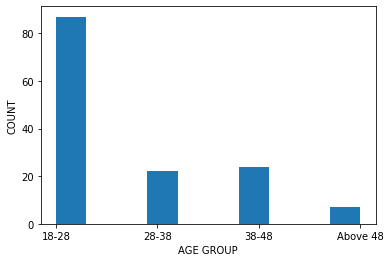

In [ ]:
plt.hist(df['Age'])
plt.xlabel('AGE GROUP')
plt.ylabel('COUNT')


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


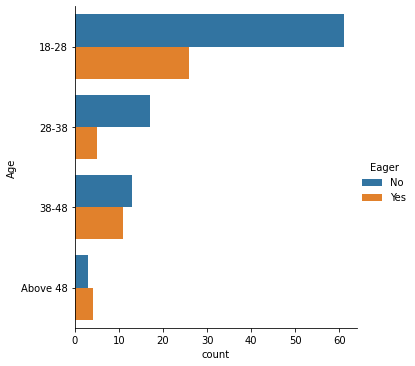

In [ ]:
sns.factorplot(y='Age',hue='Eager',kind='count', data=df)

In [ ]:
pd.crosstab(index=df['Price_hike'],columns='count',dropna=True)

col_0,count
Price_hike,
No,105
Yes,35


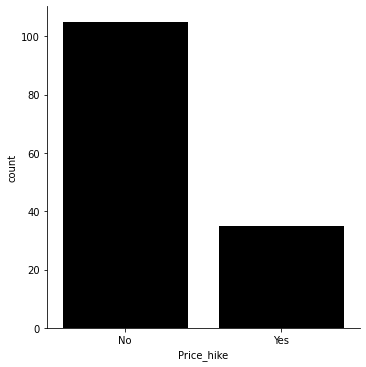

In [ ]:
sns.catplot(x='Price_hike',kind='count', data=df, color='black')


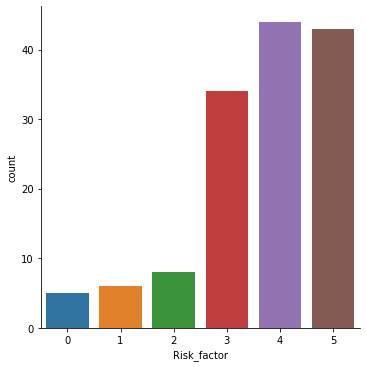

In [ ]:
#plt.figure(figsize=(8, 6))
splot=sns.catplot(x="Risk_factor",data=df,kind='count')


In [ ]:
df_group_z=df[['Age','Sex','Risk_factor']]

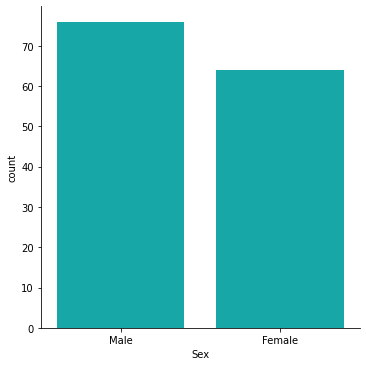

In [ ]:
sns.catplot(x='Sex', data=df, kind='count',color='c' )

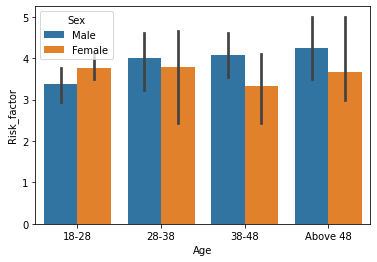

In [ ]:
sns.barplot(x='Age',y='Risk_factor', data=df_group_z, hue='Sex')

<Figure size 576x864 with 0 Axes>

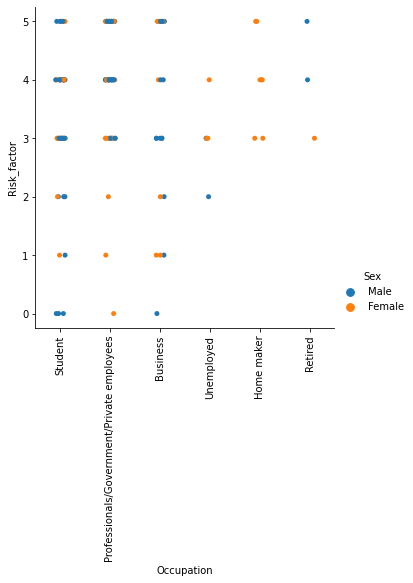

In [ ]:
df_group_y=df[['Occupation','Sex','Risk_factor']]
plt.figure(figsize=(8,12))
plot=sns.catplot(x='Occupation',y='Risk_factor', data=df_group_y, hue='Sex')
plot.set_xticklabels(rotation=90)

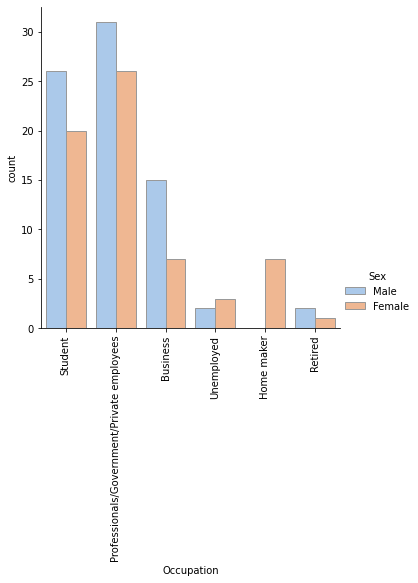

In [ ]:
g=sns.catplot(x="Occupation", hue="Sex", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)
g.set_xticklabels(rotation=90)

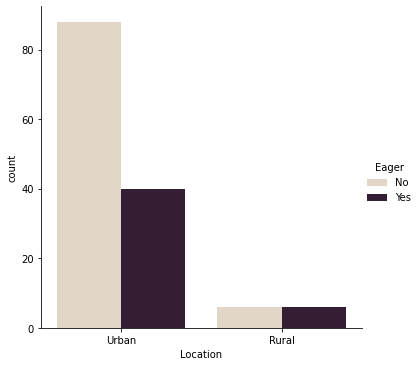

In [ ]:
sns.catplot(x="Location",hue='Eager' ,kind="count", palette="ch:.25", data=df)

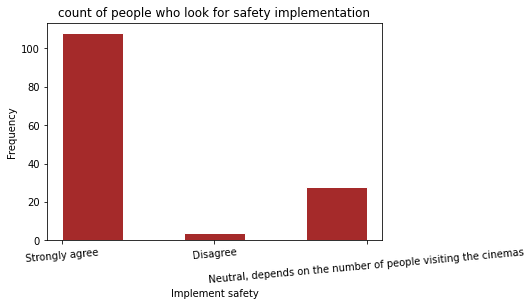

In [ ]:
plt.hist(df['Implement_safety'],
         color='brown',
         edgecolor='white',
         bins=5)
plt.title('count of people who look for safety implementation')
plt.xlabel('Implement safety')
plt.ylabel('Frequency') 
plt.xticks(rotation=5) 
plt.show()

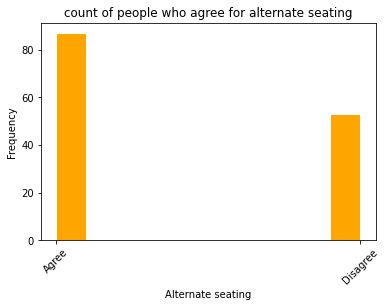

In [ ]:
plt.hist(df['alternate_seating'],
         color='orange',
         edgecolor='white')
plt.title('count of people who agree for alternate seating')
plt.xlabel('Alternate seating')
plt.ylabel('Frequency') 
plt.xticks(rotation=45) 
plt.show()

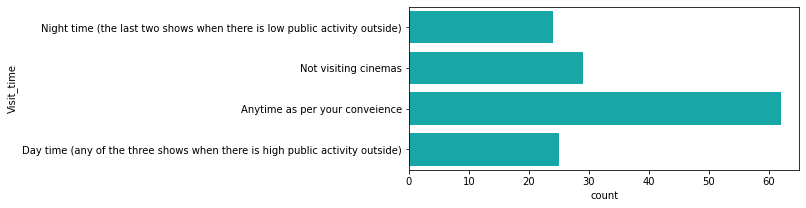

In [ ]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="Visit_time", data=df, color="c")

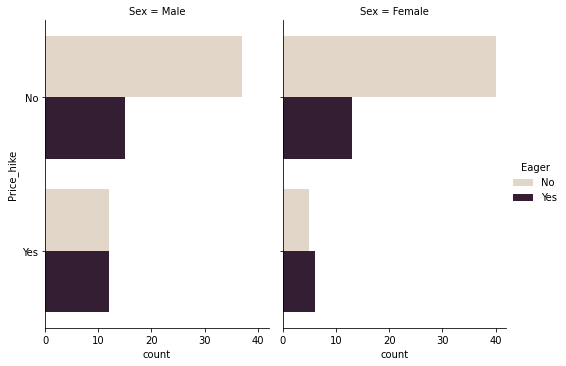

In [ ]:
sns.catplot(y="Price_hike", hue="Eager",
            col="Sex", aspect=.7, kind="count",
             data=df, palette="ch:.25")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 26.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 44.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


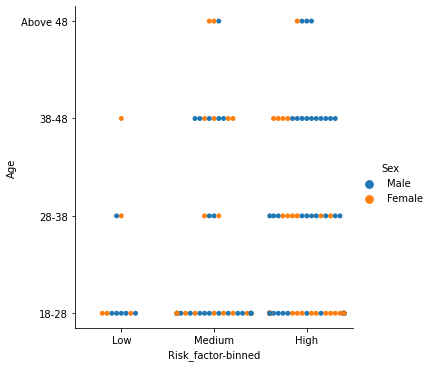

In [ ]:
sns.catplot(x="Risk_factor-binned", y="Age", order=["Low", "Medium","High"], hue='Sex', data=df, kind="swarm")

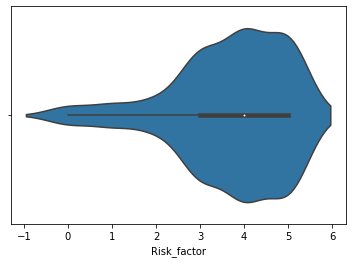

In [ ]:
x = sns.violinplot(x="Risk_factor", kind='count', data=df)

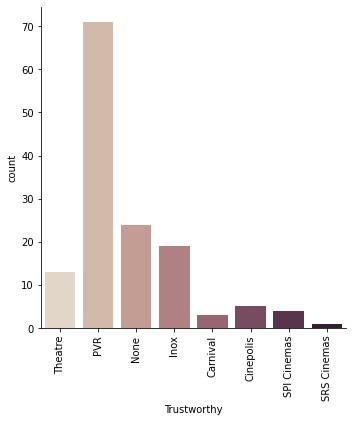

In [ ]:
u=sns.catplot(x="Trustworthy",kind="count", palette="ch:.25", data=df)
u.set_xticklabels(rotation=90)

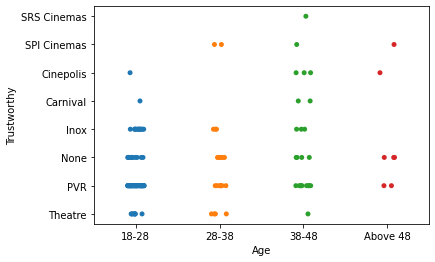

In [ ]:
sns.stripplot(x="Age",y='Trustworthy', data=df)
